___
# Boston house-prices prediction with a Linear Regression Model

What I'll do in this notebook is making an EDA (Exploratory Data Analysis) of the boston house-prices dataset (the version used will be the first from OpenML).

The EDA will be followed by training a Linear Regression model, with the goal to predict estimates of the housing selling prices, based on the already existing feature in the dataset.

## Initial setting
### Import the necessary libraries

In [52]:
import numpy as np # linear algebra
import pandas as pd # dataset handlng

# plot packages
import matplotlib.pyplot as plt
import seaborn as sns

# machine learing packages
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error, mean_squared_error

# setting for plotting
sns.set_theme()
%matplotlib inline

### Check out the data

In [3]:
boston_housing = fetch_openml(name='boston', as_frame=True, version=1)
boston_housing_df = boston_housing.data.join(boston_housing.target)

To start, let's check out how the dataset is in its first instances:

In [4]:
boston_housing_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


Then we can pass to column info:

In [5]:
boston_housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
 13  MEDV     506 non-null    float64 
dtypes: category(2), float64(12)
memory usage: 49.0 KB


We have the following feature:
- **CRIM**: per capite crime rate in the town
- **ZN**: proportion of residential land zoned for lots over 25,000 sq.ft.
- **INDUS**: proportion of non-retail business acres per town
- **CHAS**: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- **NOX**: nitric oxides concentration (parts per 10 million)
- **RM**: average number of rooms per dwelling
- **AGE**: proportion of owner-occupied units built prior to 1940
- **DIS**: weighted distances to five Boston employment centres
- **RAD**: index of accessibility to radial highways
- **TAX**: full-value property-tax rate per $10,000
- **PTRATIO**: pupil-teacher ratio by town 
- **B**: 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
- **LSTAT**: % lower status of the population

Our target instead will be 
- **MEDV** (our prediction target): Median value of owner-occupied homes in $1000's

Right before the EDA, I'll see the description of the dataset.

In [6]:
boston_housing_df.describe()

,CRIM,ZN,INDUS,NOX,RM,AGE,DIS,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.554695,6.284634,68.574901,3.795043,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.115878,0.702617,28.148861,2.105710,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.385000,3.561000,2.900000,1.129600,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.449000,5.885500,45.025000,2.100175,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.538000,6.208500,77.500000,3.207450,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.624000,6.623500,94.075000,5.188425,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,0.871000,8.780000,100.000000,12.126500,711.000000,22.000000,396.900000,37.970000,50.000000


## EDA (Exploratory Data Analysis)
In the phase I'll create several plots, to see especially how features and the target correlate to each other.

We start with a pairplot:

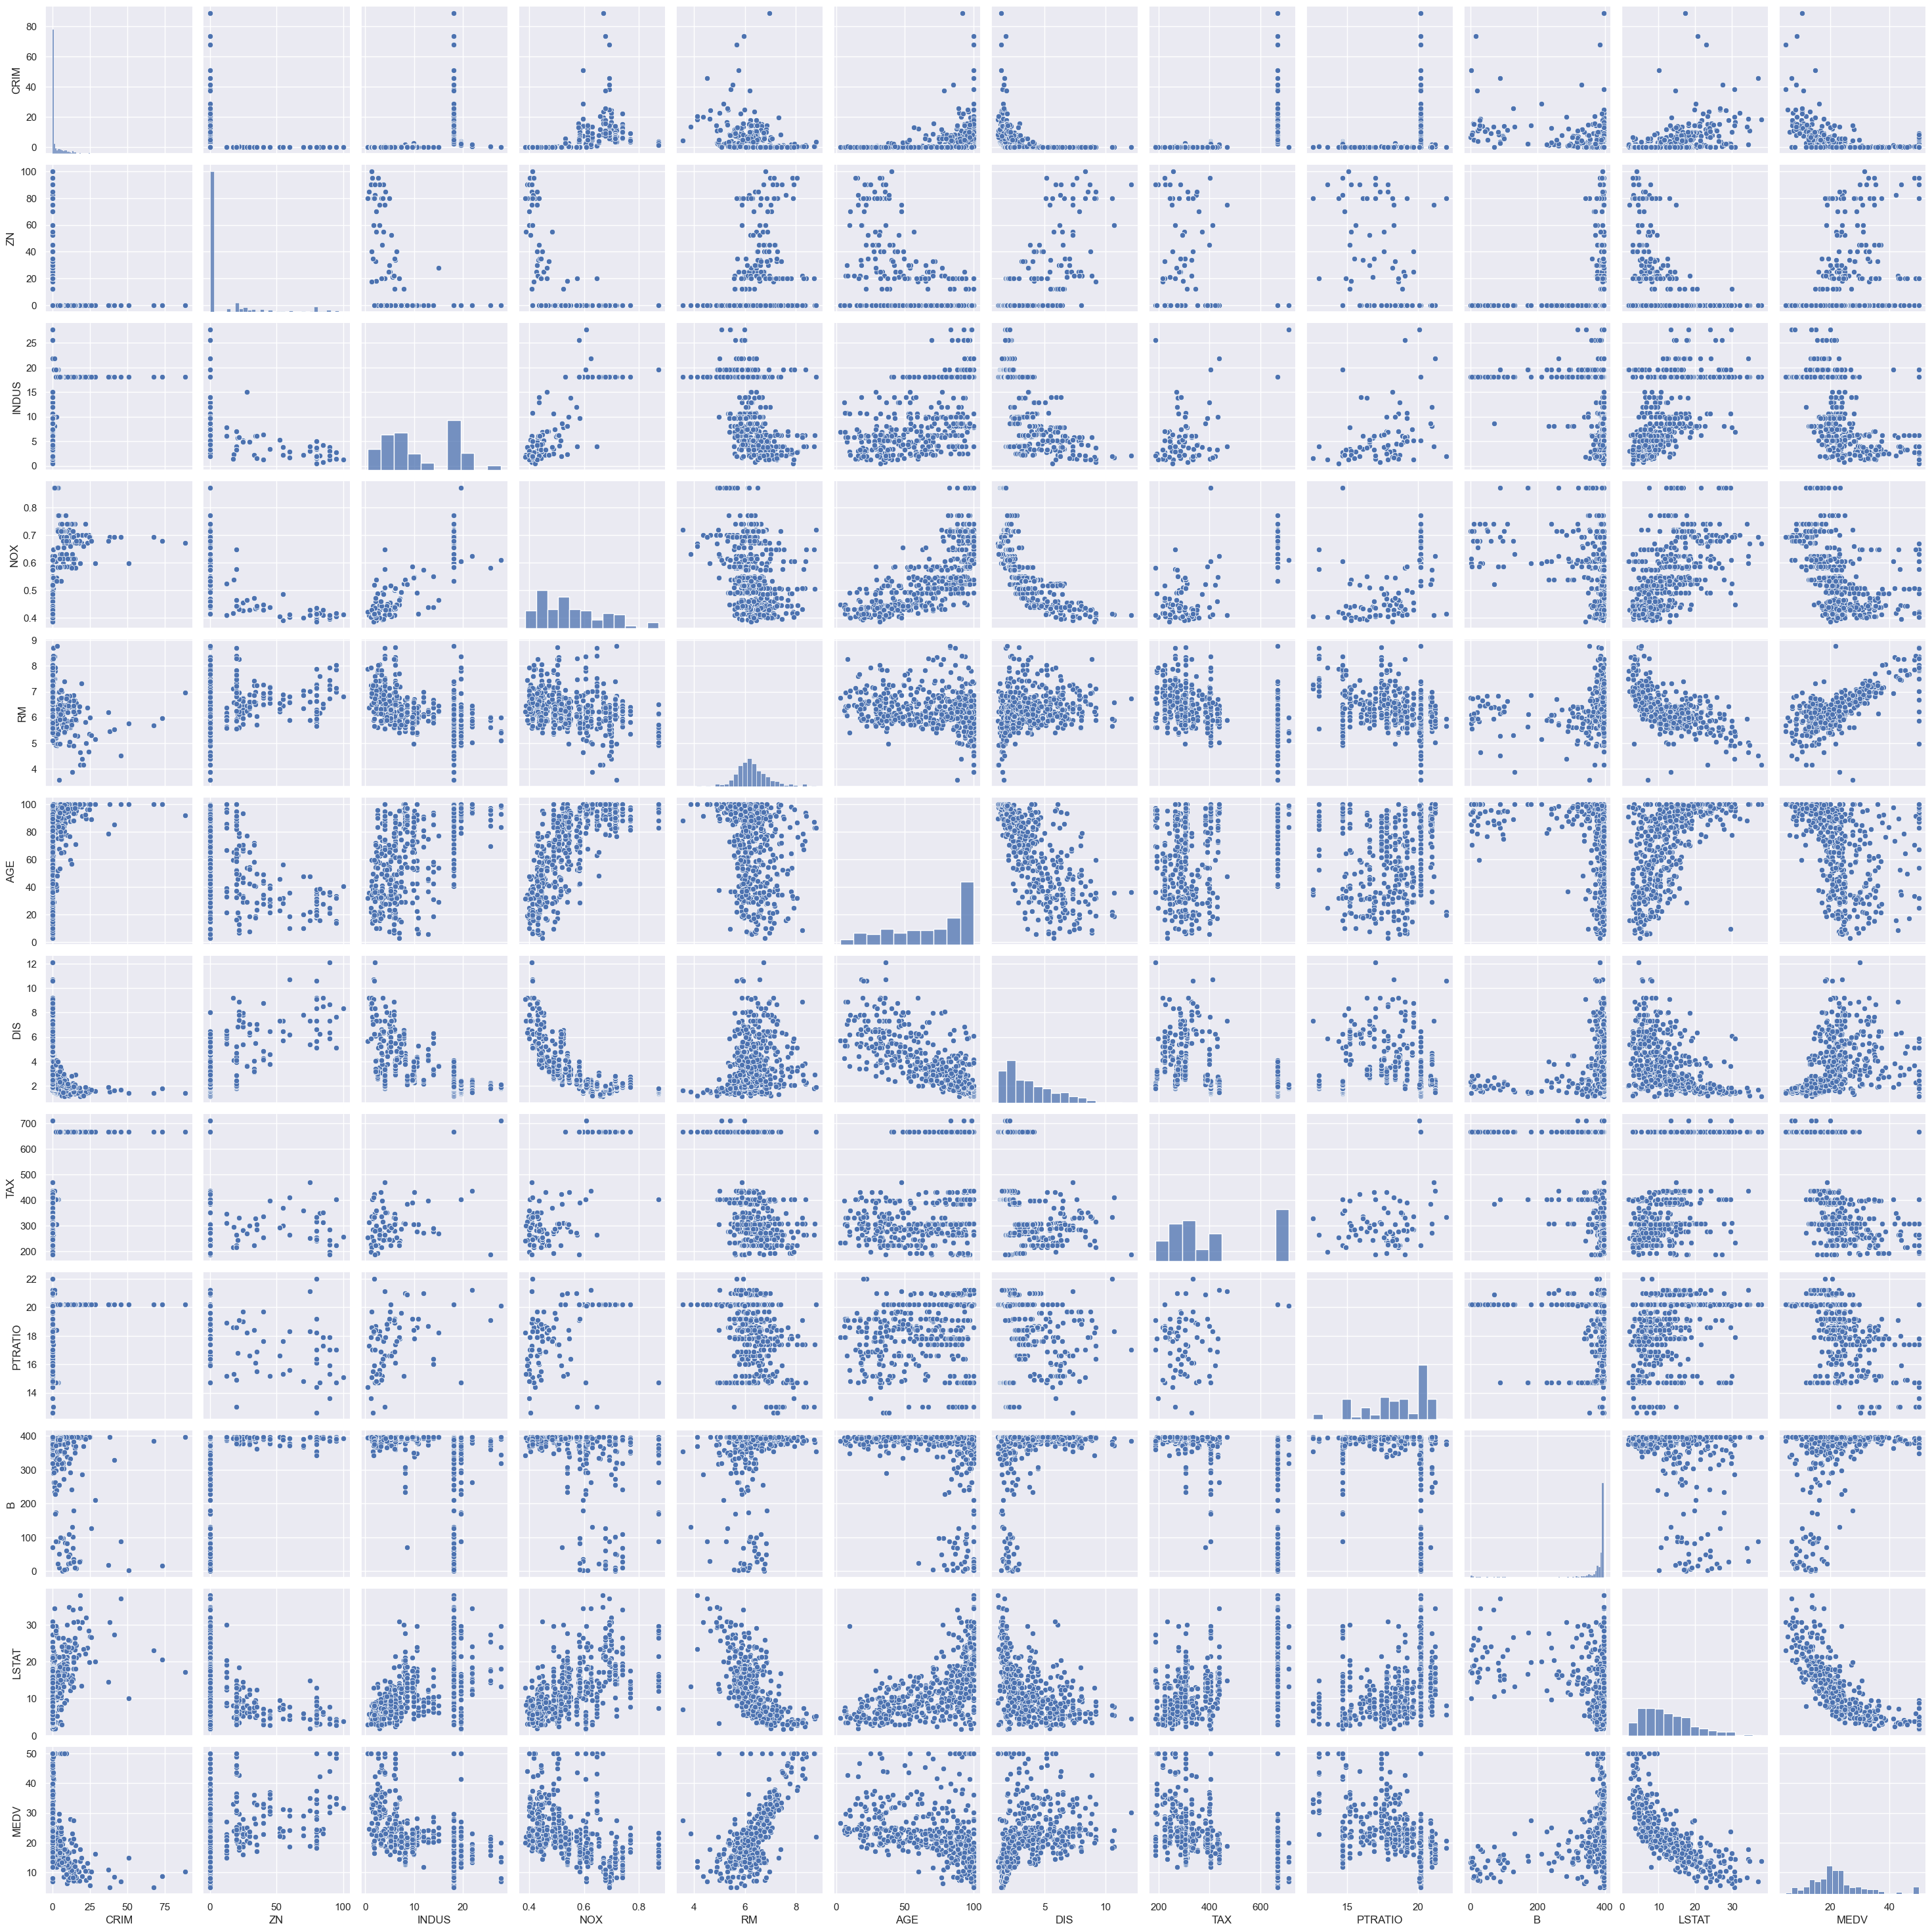

In [7]:
sns.pairplot(boston_housing_df)

Let's concentrate especially in the last row, where MEDV the dependent variable for each feature. The data seems to make sense:
- we can see much higher prices with low CRIM values;
- MEDV tends to increase with more rooms per dwelling on average (that is, for RM higher values)
- finally, higher %s of lower status of the population (LSTAT) bring to lower median values of owner-occupied homes (always MEDV)

Let's focus more on the MEDV column by plotting a distplot:

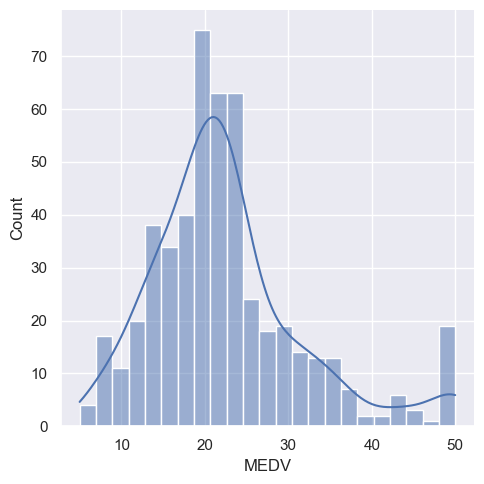

In [8]:
sns.displot(data=boston_housing_df, x='MEDV', kde=True)

According to previous description of the dataset and the plot trend, we have:
- a relatively low standard deviation (9.2)
- a price mean (22.53) slightly higher compared the the median value (21.2)

Finally, to see the correlation between the variables, let's a plot a heatmap and a clustermap of the data:

In [9]:
boston_housing_corr = boston_housing_df.corr(numeric_only=True)

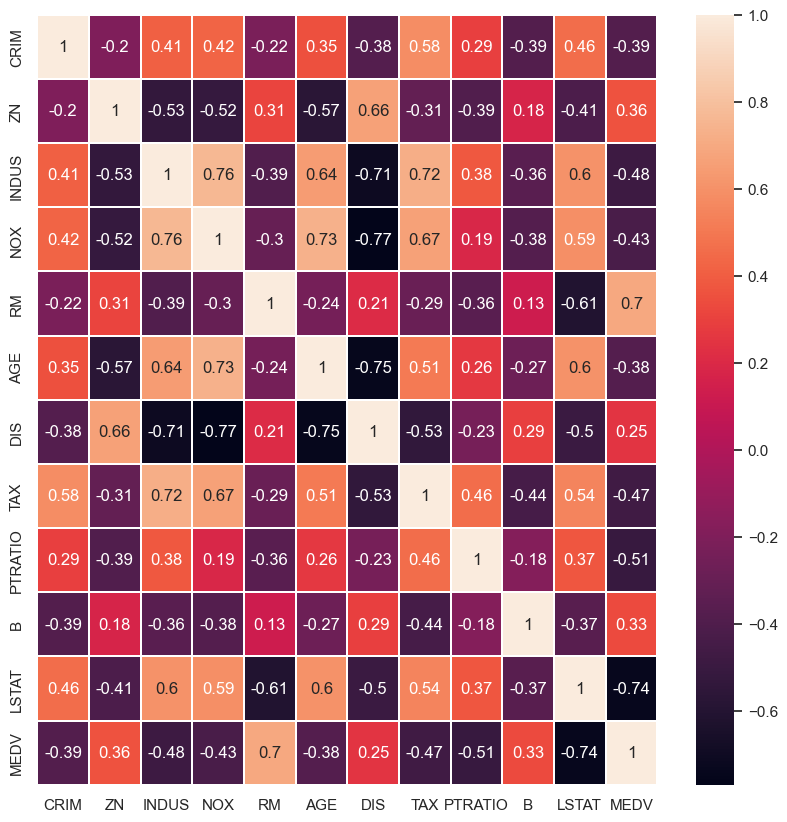

In [10]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(boston_housing_corr, annot=True, linewidths=.3, ax=ax)

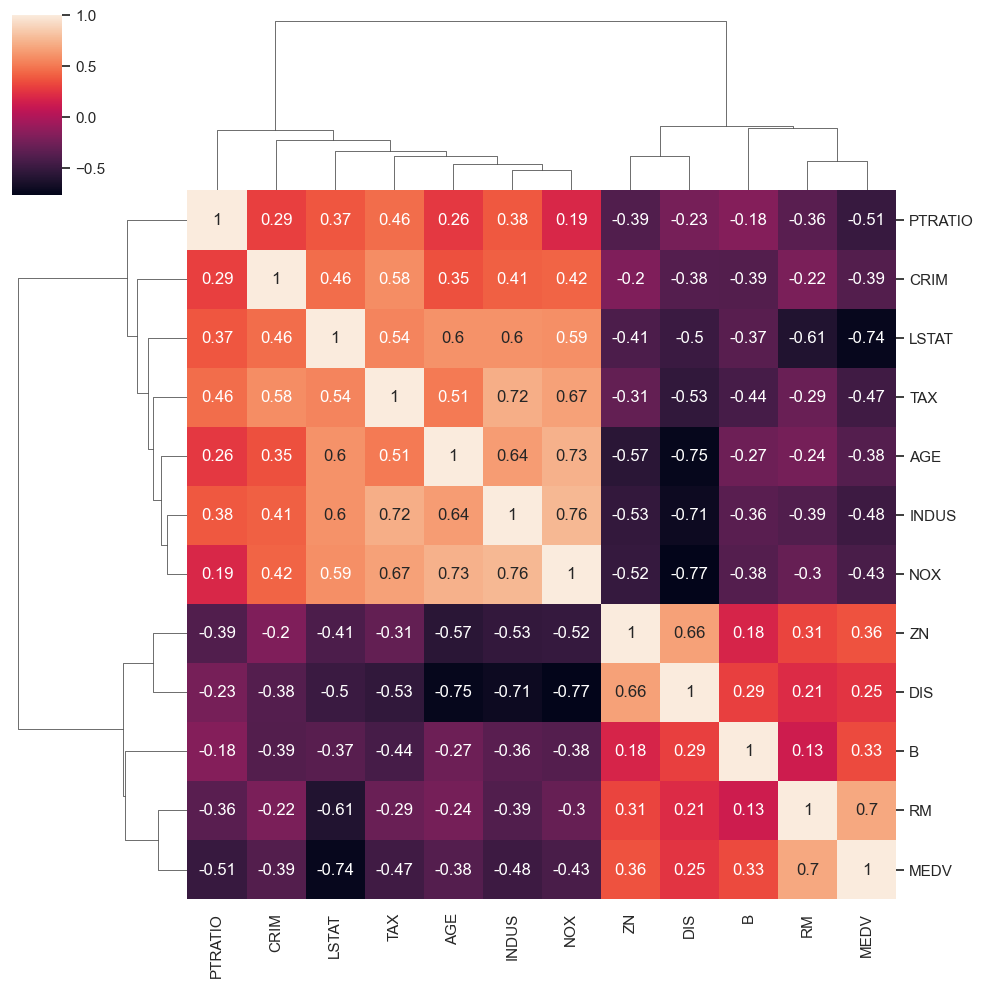

In [11]:
sns.clustermap(boston_housing_corr, annot=True)

As we can deduct, the heatmap and even more the cluster confirm the observations already done with the pairplot:
- there is a positive correlation between the median house-selling price (MEDV) and the average number of rooms per dwelling (RM)
- there is a much more negative correlation between the median house-selling price (MEDV) and the % lower status of the population (LSTAT)

## Training and making predictions with a linear regression model

Now that we complete a first EDA and visualizing the information in our dataset, we can build a linear regression model, with the goal to predict future median house-selling prices in Boston. To recall the linear repression model structure (the simple one, in particular):

<div align="center"> Y = β<sub>0</sub> + β<sub>1</sub>X </div>

Where:
- **X**: the feature variables that I'll use to predict our target variable.
- **Y**: the label we want to predict (or output variable). In our case, the Y label is MEDV.
- **β<sub>0</sub>**: also called *interceptor*, it represents the value of Y when all values of the features in X are 0.
-  **β<sub>1</sub>**: also called *coefficient*, it'll represents instead the vector of coeffients, one for each feature in X. What the coefficients mean is the increase of the value of the target Y for one unit of the associated variable in X.


### Setting X and Y labels (with feature scaling)

The X label will be represented by the features of of our dataset. Since we are in a supervised learning context, we also have a Y label, represented by MEDV. 

To be as precise as possible:
- I'll remove for this experimantation the categorical colums
- I'll standardize the remaining numerical ones.

In [28]:
# predictors
X = boston_housing_df[boston_housing_df.columns.drop(['MEDV'])]
X_std = StandardScaler().fit(X).transform(X)

# output label
y = boston_housing_df['MEDV']

### Train/test set split

To both train our model and test its performance, we need to split our original dataset in 2 parts: train set and test set. The function used to accomplish the task is "train_test_split", offered by sklearn package. 

For this sperimentation, I decide to split such that the test set will represent the 40% of the original Boston dataset.

In [30]:
# As the documentation says, the "random_state" parameters controls 
# the shuffling applied to the data before applying the split.
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=.4, random_state=101)

### Creating and training the model

Now it's to create and train our linear model. This starting from instatiating the object:

In [31]:
lm = LinearRegression()

And the fitting the training dataset into it:

In [32]:
lm.fit(X_train, y_train)

LinearRegression()

### Model Evaluation

The first step to evaluate the linear regresson model created and trained, is to check the interceptor and the coefficients and interpret them.

Let's start with the interceptor:

In [33]:
intercept = lm.intercept_
print(intercept)

22.2257772265741


The intercept represent the value of the label Y to predict (to recall, the median value of owner-occupied homes in $1000's) when the value of all feature is 0. In this case, with the train set used, we have *MEDV ~= 22.2* with *X = 0*.

Now, we pass to the coefficient: 

In [35]:
coeff_df = pd.DataFrame(lm.coef_, X.columns, columns=['Coefficient'])
coeff_df

,Coefficient
CRIM,-0.666462
ZN,0.979297
INDUS,0.624723
CHAS,1.048732
NOX,-2.312549
RM,2.028690
AGE,0.454248
DIS,-2.660559
RAD,2.263135
TAX,-1.873155


Let's interpret the coefficient obtained:
- With all other features fixed, a 1 unit increase of **CRIM** is associated with *-$0.67k*.
- With all other features fixed, a 1 unit increase of **ZN** is associated with *+$1k*.
- With all other features fixed, a 1 unit increase of **INDUS** is associated with *+$0.62k*.
- With all other features fixed, a 1 unit increase of **CHAS** is associated with *+$1.05k*.
- With all other features fixed, a 1 unit increase of **NOX** is associated with *-$2.31k*.
- With all other features fixed, a 1 unit increase of **RM** is associated with *+$2.02k*.
- With all other features fixed, a 1 unit increase of **AGE** is associated with *+$0.45k*.
- With all other features fixed, a 1 unit increase of **DIS** is associated with *-$2.66k*.
- With all other features fixed, a 1 unit increase of **RAD** is associated with *+$2.26k*.
- With all other features fixed, a 1 unit increase of **TAX** is associated with *-$1.87k*.
- With all other features fixed, a 1 unit increase of **PTRATIO** is associated with *-$1.9k*.
- With all other features fixed, a 1 unit increase of **B** is associated with *+$0.64k*.
- With all other features fixed, a 1 unit increase of **LSTAT** is associated with *-$4.59k*.


### Prediction from the model

Now it's time to predict some data with the lienar model trained! We will use the *.predict()* function with our features in the testset.

In [38]:
predictions = lm.predict(X_test)

Since we are in a supervised learning context, now we relate the prediction obtained with *y_test*, the real correct target label. I'll use a scatterplot for this task.

<AxesSubplot: xlabel='MEDV'>

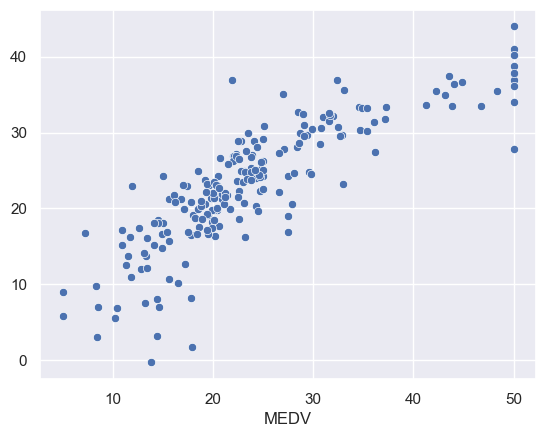

In [40]:
sns.scatterplot(x=y_test, y=predictions)

Judging from the scatteplot above and considering the poor flexibility of a linear regression model, I obtain a good result! The plot seems to visualize a quite linear trend.

Now, let's pass to the distplot of the residuals (**y_test - predictions**):  

Residuals infos:
 count    203.000000
mean       0.765304
std        5.382695
min      -14.991795
25%       -2.688843
50%       -0.256837
75%        3.351118
max       22.145538
Name: MEDV, dtype: float64


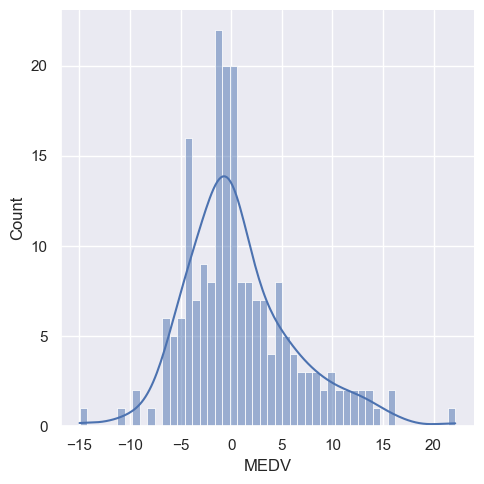

In [50]:
residuals = (y_test-predictions)
sns.displot(residuals, bins=50, kde=True)
print('Residuals infos:\n', residuals.describe())

I obtained a similar result in quality as the scatterplot. The distplot tends to have a normal distribution, which is good, in addiction to:
- a relatively low standard deviation (5.38)
- a residual mean (0.76) slightly higher compared the the median value (-0.26).

### Regression Evaluation Metrics

To end this notebook, let's evaluate the regression model created with the most common metrics for this kind of problems:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [53]:
print('MAE: ', mean_absolute_error(y_test, predictions))
print('MSE: ', mean_squared_error(y_test, predictions))
print('RMSE: ', np.sqrt(mean_squared_error(y_test, predictions)))

MAE:  3.905144802627508
MSE:  29.416365467452827
RMSE:  5.423685598138301
